In [295]:
import tensorflow
tensorflow.__version__

'2.13.0'

Import the Logan_housing.csv file as save it in a data frame df. Show the head (top 5 rows) of the data frame! (3 points)

In [296]:
import pandas as pd

In [297]:
df = pd.read_csv("/content/Logan_housing.csv")
df.head()

,Sold Price,DOM,Garage Capacity,HOA Fee,Irregular Shape,Quadrant,School District,Sold Terms,Total Bedrooms,Total Bathrooms,Total Square Feet,Year Built,Zip,year_sold,month_sold,built_after_2000
0,176000,5,2,0,No,NW,Cache,FHA,3,1,1031,1974,84335,2018,9,0
1,225000,6,2,0,No,NW,Cache,Conventional,4,2,2091,1995,84335,2018,7,0
2,274900,14,2,0,No,NW,Cache,Conventional,3,1,2016,1980,84335,2018,11,0
3,175000,16,1,0,No,NW,Cache,USDA Rural Development,4,1,1920,1978,84335,2018,6,0
4,179000,29,0,0,No,NW,Cache,Cash,4,2,1329,1976,84335,2018,9,0


Check to see if there is any missing observations in the data set. (2 points)

In [298]:
df.isna().any()

Sold Price           False
DOM                  False
Garage Capacity      False
HOA Fee              False
Irregular Shape      False
Quadrant             False
School District      False
Sold Terms           False
Total Bedrooms       False
Total Bathrooms      False
Total Square Feet    False
Year Built           False
Zip                  False
year_sold            False
month_sold           False
built_after_2000     False
dtype: bool

Determine which variables should be numerics and which should be categorical. Go ahead and change their type in the original data frame. (10 points)

In [299]:
df.nunique()

Sold Price           1217
DOM                   248
Garage Capacity        14
HOA Fee                96
Irregular Shape         2
Quadrant                4
School District         2
Sold Terms              6
Total Bedrooms          9
Total Bathrooms         7
Total Square Feet    2009
Year Built            136
Zip                    16
year_sold               3
month_sold             12
built_after_2000        2
dtype: int64

In [300]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4110 entries, 0 to 4109
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sold Price         4110 non-null   int64 
 1   DOM                4110 non-null   int64 
 2   Garage Capacity    4110 non-null   int64 
 3   HOA Fee            4110 non-null   int64 
 4   Irregular Shape    4110 non-null   object
 5   Quadrant           4110 non-null   object
 6   School District    4110 non-null   object
 7   Sold Terms         4110 non-null   object
 8   Total Bedrooms     4110 non-null   int64 
 9   Total Bathrooms    4110 non-null   int64 
 10  Total Square Feet  4110 non-null   int64 
 11  Year Built         4110 non-null   int64 
 12  Zip                4110 non-null   int64 
 13  year_sold          4110 non-null   int64 
 14  month_sold         4110 non-null   int64 
 15  built_after_2000   4110 non-null   int64 
dtypes: int64(12), object(4)
memory usage: 513.

In [301]:
columns_convert = ['built_after_2000','Sold Terms', 'School District', 'Quadrant','Irregular Shape']
for col in columns_convert:
    df[col] = df[col].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4110 entries, 0 to 4109
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Sold Price         4110 non-null   int64   
 1   DOM                4110 non-null   int64   
 2   Garage Capacity    4110 non-null   int64   
 3   HOA Fee            4110 non-null   int64   
 4   Irregular Shape    4110 non-null   category
 5   Quadrant           4110 non-null   category
 6   School District    4110 non-null   category
 7   Sold Terms         4110 non-null   category
 8   Total Bedrooms     4110 non-null   int64   
 9   Total Bathrooms    4110 non-null   int64   
 10  Total Square Feet  4110 non-null   int64   
 11  Year Built         4110 non-null   int64   
 12  Zip                4110 non-null   int64   
 13  year_sold          4110 non-null   int64   
 14  month_sold         4110 non-null   int64   
 15  built_after_2000   4110 non-null   category
dtypes: cat



In DNN, we need to change the categorical variables into dummy variables. Do this transformation and report the shape of the new data frame (5 points)

In [302]:
df = pd.get_dummies(df, ['built_after_2000','Sold Terms', 'School District', 'Quadrant','Irregular Shape'])

In [303]:
df.head()

,Sold Price,DOM,Garage Capacity,HOA Fee,Total Bedrooms,Total Bathrooms,Total Square Feet,Year Built,Zip,year_sold,...,School District_Cache,School District_Logan,Quadrant_Cash,Quadrant_Conventional,Quadrant_FHA,Quadrant_Other,Quadrant_USDA Rural Development,Quadrant_VA,Irregular Shape_0,Irregular Shape_1
0,176000,5,2,0,3,1,1031,1974,84335,2018,...,1,0,0,0,1,0,0,0,1,0
1,225000,6,2,0,4,2,2091,1995,84335,2018,...,1,0,0,1,0,0,0,0,1,0
2,274900,14,2,0,3,1,2016,1980,84335,2018,...,1,0,0,1,0,0,0,0,1,0
3,175000,16,1,0,4,1,1920,1978,84335,2018,...,1,0,0,0,0,0,1,0,1,0
4,179000,29,0,0,4,2,1329,1976,84335,2018,...,1,0,1,0,0,0,0,0,1,0


In [304]:
df.shape

(4110, 27)

Based on the dimensionality of the feature space, what is the minimum number of nodes (units) you should use in the first layer of your DNN? why? (5 points)

There are 26 feature variables and 1 target variable so there should be a minimum number of 26 nodes in the first layer to keep there from being a bottleneck for the DNN.






Use train_test_split() function from sklearn.model_selection. Split the data into 20% test, 80% train. use random_state=100 (5 points)
Use StandardScaler from sklearn.preprocessing and transform the features in the train and test set. (5 points)

In [305]:
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [306]:
X = df.drop("Sold Price", axis=1, inplace=False).values
X

array([[ 5,  2,  0, ...,  0,  1,  0],
       [ 6,  2,  0, ...,  0,  1,  0],
       [14,  2,  0, ...,  0,  1,  0],
       ...,
       [40,  0,  0, ...,  0,  1,  0],
       [49,  0,  0, ...,  0,  1,  0],
       [94,  3,  0, ...,  1,  1,  0]])

In [307]:
X.shape

(4110, 26)

In [308]:
y = df['Sold Price'].values
y

array([176000, 225000, 274900, ..., 298000, 215000, 450000])

In [309]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=100)

In [310]:
X_train.shape

(3288, 26)

In [311]:
y_test.shape

(822,)

In [312]:
from sklearn.preprocessing import StandardScaler

In [313]:
scaler = StandardScaler()

In [314]:
X_train= scaler.fit_transform(X_train)

X_test  = scaler.transform(X_test)

In [315]:
X_train

array([[-0.71474243,  0.17138212,  0.76272137, ..., -0.20126184,
        -0.97714671,  0.97714671],
       [-0.1261254 ,  0.17138212,  0.33563169, ..., -0.20126184,
        -0.97714671,  0.97714671],
       [-0.44005448,  0.17138212, -0.51854765, ..., -0.20126184,
        -0.97714671,  0.97714671],
       ...,
       [-0.61663959, -1.63762085, -0.51854765, ..., -0.20126184,
         1.02338778, -1.02338778],
       [-0.69512186, -0.73311936, -0.51854765, ..., -0.20126184,
         1.02338778, -1.02338778],
       [ 1.77706966, -1.63762085, -0.51854765, ..., -0.20126184,
         1.02338778, -1.02338778]])

Using TensorfFow, create two models. One with dropout and one without dropout. In both models, use the following properties: Input layer, 2 Dense layers (180 and 32 nodes respectively) and an output layer. Also use early stopping callback for both models. Answer the following questions:
Print out the the model summary (for the one with dropout)? How many parameters are there in each layer. How many total trainable parameters does the model have? (10 points)

In [317]:

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

No dropout:

In [318]:
def make_model():
  inputs   = keras.Input(shape=(X_train.shape[1]), name= "my_input")
  features = layers.Dense(180, activation='relu',   name='first_layer')(inputs)
  features = layers.Dense(32, activation='relu',   name='second_layer')(features)
  outputs   = layers.Dense(1,  activation='linear',name='output_layer')(features)
  model_functional = keras.Model(inputs=inputs, outputs=outputs)
  model_functional.compile(optimizer='rmsprop', loss='mean_squared_error', metrics=['mae'])
  return model_functional

With dropout:

In [319]:
def make_model_dropout():
  d_rate = .5
  inputs_d   = keras.Input(shape=(X_train.shape[1]), name= "my_input_d")
  features_d = layers.Dense(180, activation='relu',   name='first_layer_d')(inputs_d)
  features_d = layers.Dropout(d_rate)(features_d)
  features_d = layers.Dense(32, activation='relu',   name='second_layer_d')(features_d)
  features_d = layers.Dropout(d_rate)(features_d)
  outputs_d   = layers.Dense(1,  activation='linear',name='output_layer_d')(features_d)
  model_functional_d = keras.Model(inputs=inputs_d, outputs=outputs_d)
  model_functional_d.compile(optimizer='rmsprop', loss='mean_squared_error', metrics=['mae'])
  return model_functional_d

In [320]:
model = make_model()
model_d = make_model_dropout()
make_model_dropout().summary()

Model: "model_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_input_d (InputLayer)     [(None, 26)]              0         
                                                                 
 first_layer_d (Dense)       (None, 180)               4860      
                                                                 
 dropout_30 (Dropout)        (None, 180)               0         
                                                                 
 second_layer_d (Dense)      (None, 32)                5792      
                                                                 
 dropout_31 (Dropout)        (None, 32)                0         
                                                                 
 output_layer_d (Dense)      (None, 1)                 33        
                                                                 
Total params: 10685 (41.74 KB)
Trainable params: 10685 (41

There are 4860 trainable parameters in the first layer, 5792 in the second layer and 33 in the output layer. There are 0 in dropout layers and input layer. The model has a total of 10685 trainable parameters.

What activation function should you use for the last layer? (remember, this is a regression model) (5 points)

Because this is a regression model, we need to use linear as an activation function or have no activation function.

What loss function should you use? (5 points)

I am using the mean squared error loss function because it penalizes larger errors to help minimize errors during training.


Training both models! in both models, use compile(optimizer='rmsprop', loss='mean_squared_error', metrics=['mae']) and train them with
batch_size=128, epochs=2000. Make sure you set validation_data. This step may take up to 10 minutes for each model. (10 points)

In [321]:

early_stopping   = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
model_checkpoint = ModelCheckpoint(monitor='val_loss', save_best_only=True, filepath="model_checkpoint.h5") #model_checkpoint.keras#model_checkpoint.h5
callback_list    = [early_stopping,model_checkpoint]

In [322]:
model.fit(X_train,y_train, validation_data=(X_test, y_test), epochs=2000, batch_size=128,
          callbacks=callback_list)

Epoch 1/2000
26/26 [==============================] - 1s 16ms/step - loss: 93255245824.0000 - mae: 281662.8438 - val_loss: 94383857664.0000 - val_mae: 283955.5312
Epoch 2/2000
18/26 [===================>..........] - ETA: 0s - loss: 92396388352.0000 - mae: 281471.5312

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.


26/26 [==============================] - 0s 7ms/step - loss: 93250248704.0000 - mae: 281655.0000 - val_loss: 94377123840.0000 - val_mae: 283945.4375
Epoch 3/2000
26/26 [==============================] - 0s 7ms/step - loss: 93242007552.0000 - mae: 281642.6562 - val_loss: 94366408704.0000 - val_mae: 283929.7812
Epoch 4/2000
26/26 [==============================] - 0s 6ms/step - loss: 93229318144.0000 - mae: 281624.0625 - val_loss: 94350327808.0000 - val_mae: 283906.8125
Epoch 5/2000
26/26 [==============================] - 0s 6ms/step - loss: 93211844608.0000 - mae: 281598.5000 - val_loss: 94329282560.0000 - val_mae: 283876.8438
Epoch 6/2000
26/26 [==============================] - 0s 5ms/step - loss: 93188890624.0000 - mae: 281565.1875 - val_loss: 94301691904.0000 - val_mae: 283838.0000
Epoch 7/2000
26/26 [==============================] - 0s 6ms/step - loss: 93159309312.0000 - mae: 281522.6250 - val_loss: 94267080704.0000 - val_mae: 283789.5000
Epoch 8/2000
26/26 [=====================

In [323]:
model_d.fit(X_train,y_train, validation_data=(X_test, y_test), epochs=2000, batch_size=128,
          callbacks=callback_list)

Epoch 1/2000
26/26 [==============================] - 1s 18ms/step - loss: 93255450624.0000 - mae: 281663.1562 - val_loss: 94384078848.0000 - val_mae: 283955.6250
Epoch 2/2000
26/26 [==============================] - 0s 7ms/step - loss: 93250715648.0000 - mae: 281655.4062 - val_loss: 94377615360.0000 - val_mae: 283945.6875
Epoch 3/2000
26/26 [==============================] - 0s 7ms/step - loss: 93242441728.0000 - mae: 281642.7188 - val_loss: 94367113216.0000 - val_mae: 283930.0312
Epoch 4/2000
26/26 [==============================] - 0s 7ms/step - loss: 93230546944.0000 - mae: 281624.7188 - val_loss: 94351876096.0000 - val_mae: 283907.8750
Epoch 5/2000
26/26 [==============================] - 0s 7ms/step - loss: 93213417472.0000 - mae: 281599.7812 - val_loss: 94330650624.0000 - val_mae: 283877.5625
Epoch 6/2000
26/26 [==============================] - 0s 8ms/step - loss: 93189136384.0000 - mae: 281564.8125 - val_loss: 94302445568.0000 - val_mae: 283837.7500
Epoch 7/2000
26/26 [=======

Plot the loss vs epoch chart for both of the trained models. In one of them, the val_loss is lower than the train loss. Which model is that (the one with drop out or the one without drop out?). What is going on here? (15 points)

In [324]:
loss_df1 = pd.DataFrame(model.history.history)
loss_df1.tail()

,loss,mae,val_loss,val_mae
749,2.535933e+09,26924.792969,1.773041e+09,27663.998047
750,2.536477e+09,26925.513672,1.774046e+09,27669.207031
751,2.536034e+09,26888.574219,1.773870e+09,27657.857422
752,2.534351e+09,26883.751953,1.774136e+09,27657.576172
753,2.533878e+09,26912.031250,1.774533e+09,27650.335938


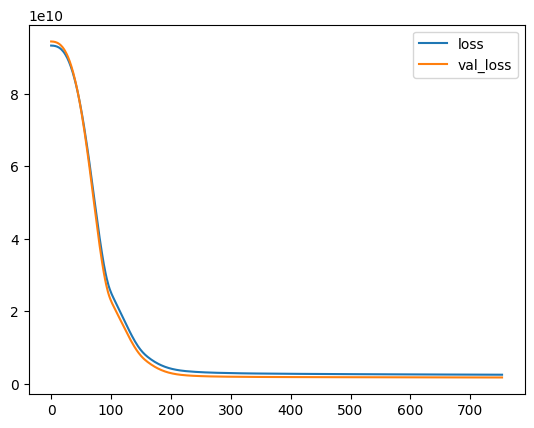

In [325]:
loss_df1[['loss', 'val_loss']].plot(legend=True)
plt.show()

In [326]:
loss_df2 = pd.DataFrame(model_d.history.history)
loss_df2.tail()

,loss,mae,val_loss,val_mae
377,8.632187e+09,66260.093750,2.280747e+09,32487.962891
378,8.804098e+09,66704.242188,2.302477e+09,32637.988281
379,8.386997e+09,65000.117188,2.306858e+09,32623.804688
380,8.779132e+09,66074.820312,2.353835e+09,32960.281250
381,8.617692e+09,66060.679688,2.345589e+09,32864.472656


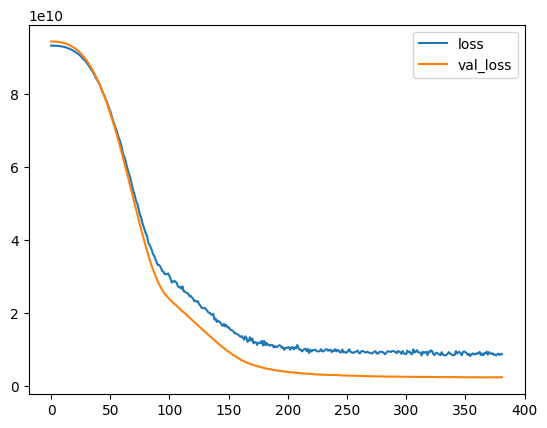

In [327]:
loss_df2[['loss', 'val_loss']].plot(legend=True) #with dropout
plt.show()

The model with drop out has a significantly lower val_ loss compared to loss. In the training phase some of the neurons are dropped out, reducing the model's effective capacity. The validation set doesn't have drop out and so it is using all the neurons which is why val_loss is less than loss from the dropout.

Evaluate the model without drop out and report the loss and MAE in the test set. (5 points)

In [328]:
model.evaluate(X_test, y_test)

26/26 [==============================] - 0s 2ms/step - loss: 1774533248.0000 - mae: 27650.3379


[1774533248.0, 27650.337890625]

I am unsure if these values are supposed to be this high. I ran into problems with tenserflow.keras with filepath on the Modelcheckpoint module. Chatgpt suggested I change it to what is listed above. If this is normal, the loss is 1774533248 and the MAE is 27650.

Again, use the results from the model without drop out and save the predictions in the test set as y_test_pred. (5 points)

In [334]:
y_test_pred = model.predict(X_test)

26/26 [==============================] - 0s 1ms/step


In [330]:
y_test_pred

array([[467611.94 ],
       [235205.12 ],
       [278985.75 ],
       [304803.2  ],
       [282923.94 ],
       [296426.88 ],
       [224864.6  ],
       [242261.69 ],
       [186930.67 ],
       [367941.84 ],
       [217889.69 ],
       [250433.94 ],
       [277494.44 ],
       [158269.45 ],
       [340948.3  ],
       [323802.06 ],
       [258723.8  ],
       [260695.03 ],
       [196814.45 ],
       [290081.06 ],
       [270401.94 ],
       [204109.78 ],
       [156742.73 ],
       [170297.16 ],
       [231793.5  ],
       [201068.9  ],
       [168685.73 ],
       [189723.16 ],
       [263537.1  ],
       [259915.56 ],
       [324069.56 ],
       [272689.3  ],
       [223383.72 ],
       [220389.84 ],
       [191218.56 ],
       [206578.19 ],
       [421681.56 ],
       [238819.1  ],
       [317445.5  ],
       [325328.88 ],
       [175549.97 ],
       [178366.88 ],
       [257683.12 ],
       [232447.5  ],
       [394318.78 ],
       [248199.92 ],
       [299847.84 ],
       [21104

From sklearn.metrics, import mean_absolute_percentage_error, explained_variance_score and r2_score. Read sklearn documentation to make sure you understand what are these metrics. Report these metrics in the test set using model without drop out? (6 points)

In [331]:
from sklearn.metrics import mean_absolute_percentage_error, explained_variance_score, r2_score

In [332]:
print(mean_absolute_percentage_error(y_test, y_test_pred))
print(explained_variance_score(y_test, y_test_pred))
print(r2_score(y_test, y_test_pred))

0.12430888208784613
0.8715249660251378
0.8709762776591102


Based on the MAPE, the model without dropout on average is 12.43 percent off with its predictions. Based on the explained variance score, the model can explain for 87.15 percent of the variation in housing prices. Based on the r2 score, the model's variance is able to be predicted 87.10 percent of the time by the model features.










Plot the scatter plot for y_true vs y_pred in the test set. Are you satisfied with what you observe? Hint: in a prefect regression model, y_true and y_pred will line up along the 45 degree line. (4 points)


Text(0, 0.5, 'Predictions')

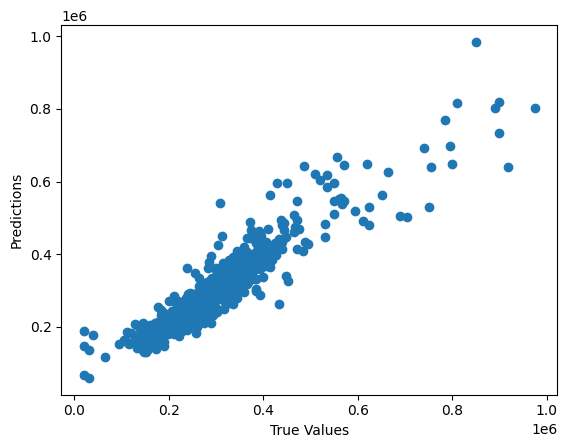

In [333]:
plt.scatter(y_test,y_test_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')

The model predicts well for lower values, but for higher values it doesn't predict as well. Overall it does a good job predicting, but I wouldn't rely as much on the higher valued predictions.